In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

crash_df = pd.read_csv('/content/crashdata2022-present.csv')
vehicle_df = pd.read_csv('/content/vehiclecrashdata2022-present.csv')

In [2]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11496 entries, 0 to 11495
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                11496 non-null  int64  
 1   Name                       11496 non-null  object 
 2   MinorInjuries              11496 non-null  int64  
 3   ModerateInjuries           11496 non-null  int64  
 4   SevereInjuries             11496 non-null  int64  
 5   FatalInjuries              11496 non-null  int64  
 6   TcrNumber                  11496 non-null  object 
 7   CityDamageFlag             11496 non-null  bool   
 8   ShortFormFlag              11496 non-null  bool   
 9   Distance                   10895 non-null  float64
 10  CrashDateTime              11496 non-null  object 
 11  PedestrianAction           11496 non-null  object 
 12  RoadwaySurface             11496 non-null  object 
 13  RoadwayCondition           11496 non-null  obj

In [3]:
crash_df['CollisionType'].value_counts()

,count
CollisionType,
Rear End,2961
Broadside,2312
Sideswipe,2311
Hit Object,1017
Head On,850
Vehicle/Bike,689
Vehicle/Pedestrian,655
Other,649
Overturned,52


In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25694 entries, 0 to 25693
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CrashName                   25694 non-null  object 
 1   Name                        25694 non-null  object 
 2   Sex                         18192 non-null  object 
 3   Age                         25694 non-null  int64  
 4   Speed                       0 non-null      float64
 5   VehicleDamage               24945 non-null  object 
 6   PartyCategory               25694 non-null  object 
 7   Sobriety                    25694 non-null  object 
 8   VehicleDirection            25694 non-null  object 
 9   MovementPrecedingCollision  25694 non-null  object 
 10  PartyType                   25694 non-null  object 
 11  OtherAssociatedFactor       25694 non-null  object 
 12  VehicleCount                25694 non-null  int64  
 13  ViolationCode               256

In [5]:
# label encoding CollisionType
from sklearn.preprocessing import LabelEncoder

collision_type_le = LabelEncoder()
crash_df['CollisionTypeConverted'] = collision_type_le.fit_transform(crash_df['CollisionType'])
crash_df['CollisionTypeConverted']

,CollisionTypeConverted
0,5
1,5
2,5
3,3
4,7
...,...
11491,2
11492,3
11493,6
11494,6


In [6]:
# Label encoding for the lighting feature
lighting_le = LabelEncoder()
crash_df['LightingConverted'] = lighting_le.fit_transform(crash_df['Lighting'])
# label encoding for the weather feature
weather_le = LabelEncoder()
crash_df['WeatherConverted'] = weather_le.fit_transform(crash_df['Weather'])
# label encoding for the road surface feature
road_surf_le = LabelEncoder()
crash_df['RoadwaySurfaceConverted'] = road_surf_le.fit_transform(crash_df['RoadwaySurface'])

In [7]:
# convert 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries' columns to a single column
crash_df['Severity'] = np.argmax(crash_df[['MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries']], axis=1)
crash_df['Severity'].describe()

,Severity
count,11496.000000
mean,0.196590
std,0.524453
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [8]:
# convert datatype of CrashDateTime column into numerical values

def map_hour_to_group(hour):
  if hour >= 0 and hour < 4:
    return 0
  elif hour >= 4 and hour < 8:
    return 1
  elif hour >= 8 and hour < 12:
    return 2
  elif hour >= 12 and hour < 16:
    return 3
  elif hour >=16  and hour < 20:
    return 4
  elif hour >= 20 and hour < 24:
    return 5

crash_df['CrashHour'] = pd.to_datetime(crash_df['CrashDateTime']).dt.hour
crash_df['CrashHourGroup'] = crash_df['CrashHour'].apply(map_hour_to_group)
crash_df['CrashHourGroup']

<ipython-input-8-7bbc2a142cb7>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crash_df['CrashHour'] = pd.to_datetime(crash_df['CrashDateTime']).dt.hour


,CrashHourGroup
0,3
1,5
2,5
3,2
4,4
...,...
11491,5
11492,5
11493,3
11494,3


In [9]:
# combine crash_df and vehicle_df using "Name" and "CrashName"
merged_df = pd.merge(crash_df, vehicle_df, left_on='Name', right_on='CrashName', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CrashFactId                 23735 non-null  int64  
 1   Name_x                      23735 non-null  object 
 2   MinorInjuries_x             23735 non-null  int64  
 3   ModerateInjuries_x          23735 non-null  int64  
 4   SevereInjuries_x            23735 non-null  int64  
 5   FatalInjuries_x             23735 non-null  int64  
 6   TcrNumber                   23735 non-null  object 
 7   CityDamageFlag              23735 non-null  bool   
 8   ShortFormFlag               23735 non-null  bool   
 9   Distance                    22507 non-null  float64
 10  CrashDateTime               23735 non-null  object 
 11  PedestrianAction            23735 non-null  object 
 12  RoadwaySurface              23735 non-null  object 
 13  RoadwayCondition            237

In [10]:
# label encoding for the Sobriety
sobriety_le = LabelEncoder()
merged_df['SobrietyConverted'] = sobriety_le.fit_transform(merged_df['Sobriety'])
# label encoding for the Sex
sex_le = LabelEncoder()
merged_df['SexConverted'] = sex_le.fit_transform(merged_df['Sex'])

In [11]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = merged_df[['Severity','CityDamageFlag', 'CrashHourGroup', 'RoadwaySurfaceConverted', 'LightingConverted', 'WeatherConverted', 'CollisionTypeConverted', 'SpeedingFlag', 'SexConverted','SobrietyConverted']], merged_df['HitAndRunFlag']


In [12]:
# Check information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Severity                 23735 non-null  int64
 1   CityDamageFlag           23735 non-null  bool 
 2   CrashHourGroup           23735 non-null  int64
 3   RoadwaySurfaceConverted  23735 non-null  int64
 4   LightingConverted        23735 non-null  int64
 5   WeatherConverted         23735 non-null  int64
 6   CollisionTypeConverted   23735 non-null  int64
 7   SpeedingFlag             23735 non-null  bool 
 8   SexConverted             23735 non-null  int64
 9   SobrietyConverted        23735 non-null  int64
dtypes: bool(2), int64(8)
memory usage: 1.5 MB


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [18]:
# !pip install xgboost

In [15]:
# !pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [17]:
# Hyperparameter tuning
import optuna
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 3)
    }
    model = xgb.XGBClassifier(**param, objective='binary:logistic', eval_metric='auc')
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best parameters: {study.best_params}")


[I 2024-12-13 20:11:45,489] A new study created in memory with name: no-name-f12cb3a3-de4f-4c4d-af7b-734e4c8b6565
[W 2024-12-13 20:11:45,503] Trial 0 failed with parameters: {'max_depth': 3, 'learning_rate': 0.1038530904476226, 'n_estimators': 377, 'scale_pos_weight': 1.886357976851684} because of the following error: NameError("name 'xgb' is not defined").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-17-aa010e4c5d2e>", line 12, in objective
    model = xgb.XGBClassifier(**param, objective='binary:logistic', eval_metric='auc')
NameError: name 'xgb' is not defined
[W 2024-12-13 20:11:45,511] Trial 0 failed with value None.


NameError: name 'xgb' is not defined

In [46]:
# tuned model
import xgboost as xgb
param = {'max_depth': 5, 'learning_rate': 0.18572445275228577, 'n_estimators': 139, 'scale_pos_weight': 1.7359975793060198}
tuned_model = xgb.XGBClassifier(**param, objective='binary:logistic', eval_metric='auc')
tuned_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18572445275228577,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=139, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
import xgboost as xgb
basic_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')
# basic XGBoost model
basic_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

basic_y_pred = basic_model.predict(X_test)
print("Basic XGBoost with (2022-present crash / vehicles datasets)")
# Calculate accuracy
accuracy = accuracy_score(y_test, basic_y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, basic_y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, basic_y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, basic_y_pred)
print("F1-Score:", f1)

Basic XGBoost with (2022-present crash / vehicles datasets)
Accuracy: 0.7861807457341479
Precision: 0.672566371681416
Recall (Sensitivity): 0.41304347826086957
F1-Score: 0.5117845117845118


In [47]:
# Hyperparameter tuned XGBoost model
tuned_y_pred = tuned_model.predict(X_test)

print("Hyperparameter tuned XGBoost with (2022-present crash / vehicles datasets)")
# Calculate accuracy
accuracy = accuracy_score(y_test, tuned_y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, tuned_y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, tuned_y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, tuned_y_pred)
print("F1-Score:", f1)

Hyperparameter tuned XGBoost with (2022-present crash / vehicles datasets)
Accuracy: 0.7821782178217822
Precision: 0.6065436241610739
Recall (Sensitivity): 0.5613354037267081
F1-Score: 0.5830645161290322


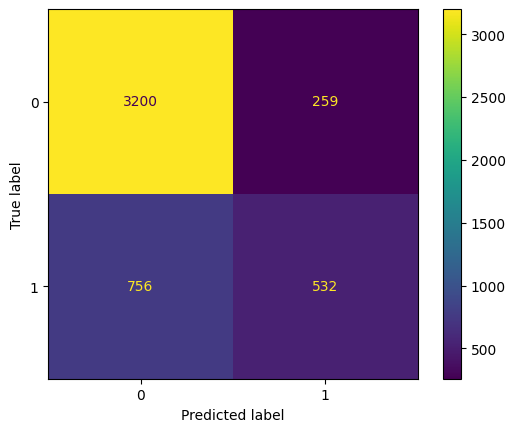

In [58]:
# basic model confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, basic_y_pred, labels=basic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=basic_model.classes_)
disp.plot()

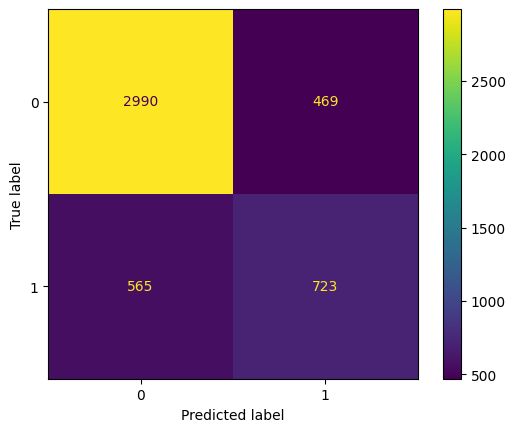

In [48]:
# hyperparameter tuned model confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, tuned_y_pred, labels=tuned_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tuned_model.classes_)
disp.plot()

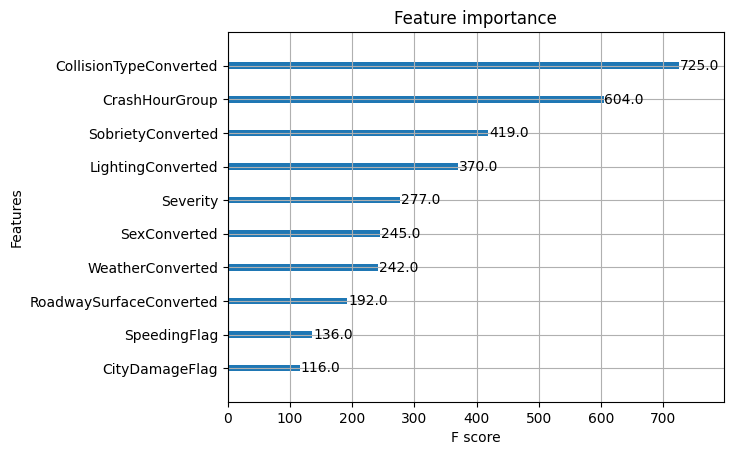

In [50]:
xgb.plot_importance(tuned_model)
plt.show()

In [51]:
hr_df = merged_df[merged_df['HitAndRunFlag']==1]

In [52]:
crash_df['CrashHourGroup'].value_counts()

,count
CrashHourGroup,
4,2921
3,2450
5,1985
2,1970
0,1188
1,982


In [53]:
hr_df['CrashHourGroup'].value_counts()

,count
CrashHourGroup,
4,1437
5,1426
0,1039
3,974
2,790
1,570


In [54]:
crash_df['CollisionType'].value_counts()

,count
CollisionType,
Rear End,2961
Broadside,2312
Sideswipe,2311
Hit Object,1017
Head On,850
Vehicle/Bike,689
Vehicle/Pedestrian,655
Other,649
Overturned,52


In [55]:
hr_df['CollisionTypeConverted'].value_counts()

,count
CollisionTypeConverted,
5,1860
6,1839
0,882
1,478
8,364
7,310
2,254
3,234
4,15


In [56]:
collision_type_le.inverse_transform([0,1,2,3,4,5,6,7,8])

array(['Broadside', 'Head On', 'Hit Object', 'Other', 'Overturned',
       'Rear End', 'Sideswipe', 'Vehicle/Bike', 'Vehicle/Pedestrian'],
      dtype=object)

In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CrashFactId                 23735 non-null  int64  
 1   Name_x                      23735 non-null  object 
 2   MinorInjuries_x             23735 non-null  int64  
 3   ModerateInjuries_x          23735 non-null  int64  
 4   SevereInjuries_x            23735 non-null  int64  
 5   FatalInjuries_x             23735 non-null  int64  
 6   TcrNumber                   23735 non-null  object 
 7   CityDamageFlag              23735 non-null  bool   
 8   ShortFormFlag               23735 non-null  bool   
 9   Distance                    22507 non-null  float64
 10  CrashDateTime               23735 non-null  object 
 11  PedestrianAction            23735 non-null  object 
 12  RoadwaySurface              23735 non-null  object 
 13  RoadwayCondition            237